# Chapter 1. Vectors and vector spaces

In [1]:
from sklearn.datasets import load_iris

data = load_iris()

X, y = data["data"], data["target"]

In [2]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [3]:
X.shape

(150, 4)

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

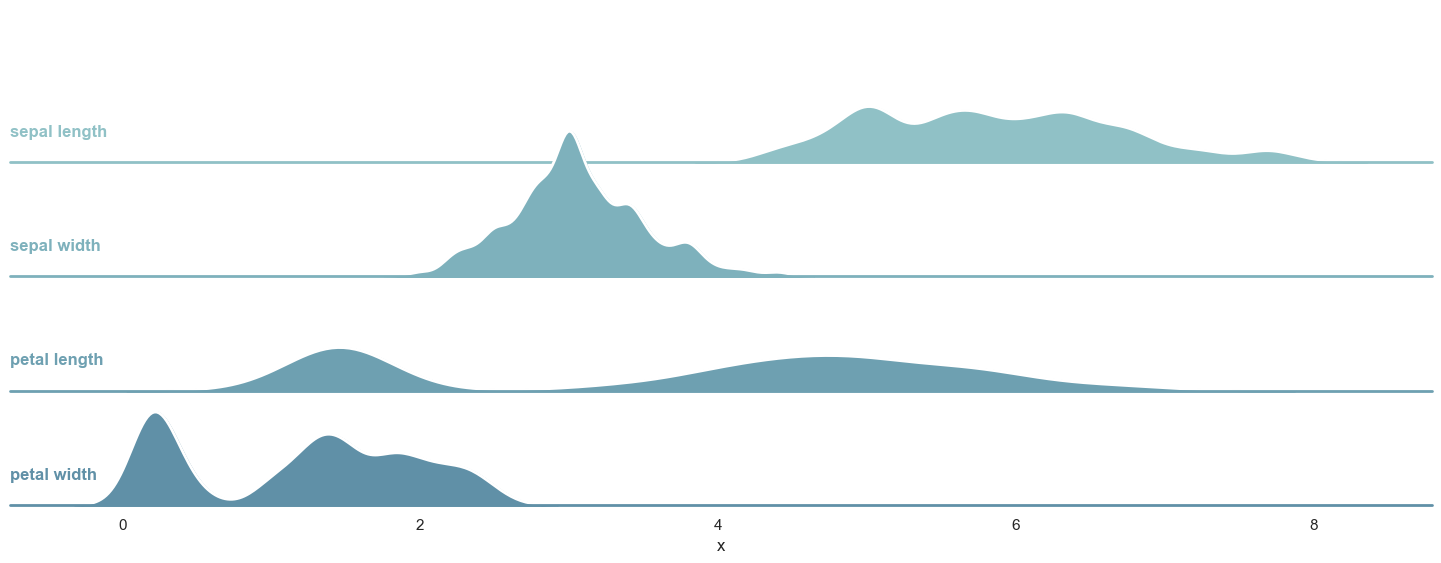

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
x = X.ravel()
labels = ["sepal length", "sepal width", "petal length", "petal width"]
g = np.tile(labels, len(X))
df = pd.DataFrame(dict(x=x, g=g))

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=10, height=1.5, palette=pal)

# Draw the densities
g.map(sns.kdeplot, "x", bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# Add reference line
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Label each plot
g.map(lambda x, color, label: plt.gca().text(0, .2, label, fontweight="bold", color=color,
                                             ha="left", va="center", transform=plt.gca().transAxes), "x")

# Adjust subplots and aesthetics
g.figure.subplots_adjust(hspace=-.25)
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

plt.show()

In [6]:
X_scaled = (X - X.mean(axis=0))/X.std(axis=0)

In [7]:
X_scaled[:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

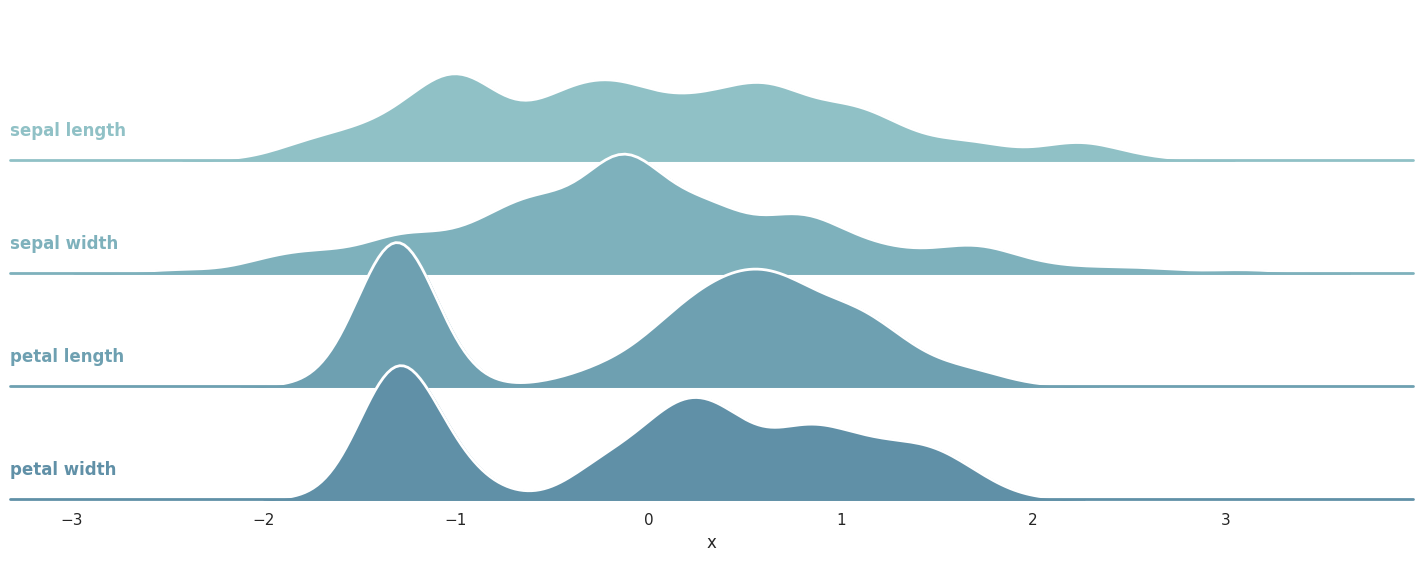

In [8]:
# Create the data
x = X_scaled.ravel()
labels = ["sepal length", "sepal width", "petal length", "petal width"]
g = np.tile(labels, X_scaled.shape[0])
df = pd.DataFrame(dict(x=x, g=g))

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
grid = sns.FacetGrid(df, row="g", hue="g", aspect=10, height=1.5, palette=pal)

# Draw the densities
grid.map(sns.kdeplot, "x", bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
grid.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# Add reference line
grid.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Add labels to each plot
grid.map(lambda x, color, label: plt.gca().text(0, .2, label, fontweight="bold", color=color,
                                                ha="left", va="center", transform=plt.gca().transAxes), "x")

# Adjust subplots and aesthetics
grid.figure.subplots_adjust(hspace=-.25)
grid.set_titles("")
grid.set(yticks=[], ylabel="")
grid.despine(bottom=True, left=True)

plt.show()


## Vectors in practice

### Tuples

In [9]:
v_tuple = (1, 3.5, -2.71, "a string", 42)

In [10]:
v_tuple

(1, 3.5, -2.71, 'a string', 42)

In [11]:
type(v_tuple)

tuple

In [12]:
v_tuple[0]

1

In [13]:
len(v_tuple)

5

In [14]:
v_tuple[1:4]

(3.5, -2.71, 'a string')

In [15]:
v_tuple[0] = 2

TypeError: 'tuple' object does not support item assignment

### Lists

In [16]:
v_list = [1, 3.5, -2.71, "qwerty"]

In [17]:
type(v_list)

list

In [18]:
v_list[0] = "this is a string"

In [19]:
v_list

['this is a string', 3.5, -2.71, 'qwerty']

In [20]:
v_list_addr = id(v_list)

In [21]:
v_list_addr

132788735804480

In [22]:
v_list.append([42])    # adding the list [42] to the end of our list
v_list

['this is a string', 3.5, -2.71, 'qwerty', [42]]

In [23]:
id(v_list) == v_list_addr    # adding elements doesn't create any new objects

True

In [24]:
v_list.pop(1)    # removing the element at the index "1"
v_list

['this is a string', -2.71, 'qwerty', [42]]

In [25]:
id(v_list) == v_list_addr    # removing elements still doesn't create any new objects

True

In [26]:
[1, 2, 3] + [4, 5, 6]

[1, 2, 3, 4, 5, 6]

In [27]:
3*[1, 2, 3]

[1, 2, 3, 1, 2, 3, 1, 2, 3]

### NumPy arrays

In [28]:
l = [2**142 + 1, "a string"]

In [29]:
l.append(lambda x: x)

In [30]:
l

[5575186299632655785383929568162090376495105,
 'a string',
 <function __main__.<lambda>(x)>]

In [31]:
[id(x) for x in l]

[132788782689440, 132788734047280, 132788740956992]

In [32]:
import numpy as np

In [33]:
X = np.array([87.7, 4.5, -4.1, 42.1414, -3.14, 2.001])    # creating a NumPy array from a Python list

In [34]:
X

array([87.7   ,  4.5   , -4.1   , 42.1414, -3.14  ,  2.001 ])

In [35]:
np.ones(shape=7)    # initializing a NumPy array from scratch using ones

array([1., 1., 1., 1., 1., 1., 1.])

In [36]:
np.zeros(shape=5)    # initializing a NumPy array from scratch using zeros

array([0., 0., 0., 0., 0.])

In [37]:
np.random.rand(10)

array([0.40684741, 0.15809785, 0.42182315, 0.31453844, 0.32930063,
       0.81619862, 0.72496837, 0.80336113, 0.28334256, 0.76902365])

In [38]:
np.zeros_like(X)

array([0., 0., 0., 0., 0., 0.])

In [39]:
X[0] = 1545.215
X

array([1545.215 ,    4.5   ,   -4.1   ,   42.1414,   -3.14  ,    2.001 ])

In [40]:
X[1:4]

array([ 4.5   , -4.1   , 42.1414])

In [41]:
X[0] = "str"

ValueError: could not convert string to float: 'str'

In [42]:
X.dtype

dtype('float64')

In [43]:
val = 23
type(val)

int

In [44]:
X[0] = val
X

array([23.    ,  4.5   , -4.1   , 42.1414, -3.14  ,  2.001 ])

In [45]:
for x in X:
    print(x)

23.0
4.5
-4.1
42.1414
-3.14
2.001


### NumPy arrays as vectors

In [46]:
v_1 = np.array([-4.0, 1.0, 2.3])
v_2 = np.array([-8.3, -9.6, -7.7])

In [47]:
v_1 + v_2    # adding v_1 and v_2 together as vectors

array([-12.3,  -8.6,  -5.4])

In [48]:
10.0*v_1    # multiplying v_1 with a scalar

array([-40.,  10.,  23.])

In [49]:
v_1 * v_2    # the elementwise product of v_1 and v_2

array([ 33.2 ,  -9.6 , -17.71])

In [50]:
np.zeros(shape=3) + 1

array([1., 1., 1.])

In [51]:
def f(x):
    return 3*x**2 - x**4

In [52]:
f(v_1)

array([-208.    ,    2.    ,  -12.1141])

In [53]:
from timeit import timeit


n_runs = 100000
size = 1000


t_add_builtin = timeit(
    "[x + y for x, y in zip(v_1, v_2)]",
    setup=f"size={size}; v_1 = [0 for _ in range(size)]; v_2 = [0 for _ in range(size)]",
    number=n_runs
)

t_add_numpy = timeit(
    "v_1 + v_2",
    setup=f"import numpy as np; size={size}; v_1 = np.zeros(shape=size); v_2 = np.zeros(shape=size)",
    number=n_runs
)


print(f"Built-in addition:       \t{t_add_builtin} s")
print(f"NumPy addition:          \t{t_add_numpy} s")
print(f"Performance improvement: \t{t_add_builtin/t_add_numpy:.3f} times faster")

Built-in addition:       	1.9108931999944616 s
NumPy addition:          	0.0561055559956003 s
Performance improvement: 	34.059 times faster


### Is NumPy really faster than Python?

In [54]:
from numpy.random import random as random_np
from random import random as random_py


n_runs = 10000000
t_builtin = timeit(random_py, number=n_runs)
t_numpy = timeit(random_np, number=n_runs)

print(f"Built-in random:\t{t_builtin} s")
print(f"NumPy random:   \t{t_numpy} s")

Built-in random:	0.1752904639870394 s
NumPy random:   	2.6580717460019514 s


In [55]:
size = 1000
n_runs = 10000

t_builtin_list = timeit(
    "[random_py() for _ in range(size)]",
    setup=f"from random import random as random_py; size={size}",
    number=n_runs
)

t_numpy_array = timeit(
    "random_np(size)",
    setup=f"from numpy.random import random as random_np; size={size}",
    number=n_runs
)

print(f"Built-in random with lists:\t{t_builtin_list}s")
print(f"NumPy random with arrays:  \t{t_numpy_array}s")

Built-in random with lists:	0.2801556949852966s
NumPy random with arrays:  	0.04289296400384046s


In [56]:
from IPython.core import page
page.page = print

In [57]:
def builtin_random_single(n_runs):
    for _ in range(n_runs):
        random_py()

In [58]:
n_runs = 10000000

%prun builtin_random_single(n_runs)

         10000174 function calls (10000173 primitive calls) in 1.113 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.494    0.494    0.883    0.883 2471337341.py:1(builtin_random_single)
 10000000    0.464    0.000    0.464    0.000 {method 'random' of '_random.Random' objects}
        1    0.135    0.135    1.019    1.019 threading.py:637(wait)
        1    0.009    0.009    0.016    0.016 {method 'execute' of 'sqlite3.Connection' objects}
        2    0.007    0.004    0.013    0.007 {method '__exit__' of 'sqlite3.Connection' objects}
      2/1    0.004    0.002    0.884    0.884 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.000    0.000    0.000    0.000 inspect.py:3102(_bind)
        1    0.000    0.000    0.029    0.029 history.py:1008(_writeout_input_cache)
        1    0.000    0.000    0.029    0.029 histor

In [59]:
def numpy_random_single(n_runs):
    for _ in range(n_runs):
        random_np()

In [60]:
%prun numpy_random_single(n_runs)

         251 function calls (247 primitive calls) in 3.294 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    2.635    2.635    2.635    2.635 2015715881.py:1(numpy_random_single)
        2    0.477    0.238    0.477    0.238 {method 'poll' of 'select.epoll' objects}
        1    0.158    0.158    3.271    3.271 threading.py:637(wait)
        2    0.013    0.007    0.013    0.007 {method '__exit__' of 'sqlite3.Connection' objects}
        1    0.005    0.005    0.005    0.005 {method 'execute' of 'sqlite3.Connection' objects}
      2/1    0.005    0.002    2.635    2.635 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        2    0.000    0.000    0.477    0.238 base_events.py:1910(_run_once)
        1    0.000    0.000    0.000    0.000 inspect.py:3102(_bind)
        1    0.000    0.000    0.018    0.018 history.py:1008(_writeout_inpu

In [61]:
def builtin_random_list(size, n_runs):
    for _ in range(n_runs):
        [random_py() for _ in range(size)]

In [62]:
size = 1000
n_runs = 10000

%prun builtin_random_list(size, n_runs)

         10000174 function calls (10000173 primitive calls) in 1.182 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.529    0.529    0.932    0.932 2575888617.py:1(builtin_random_list)
 10000000    0.481    0.000    0.481    0.000 {method 'random' of '_random.Random' objects}
        1    0.153    0.153    1.086    1.086 threading.py:637(wait)
        2    0.007    0.004    0.013    0.006 {method '__exit__' of 'sqlite3.Connection' objects}
        1    0.006    0.006    0.010    0.010 {method 'execute' of 'sqlite3.Connection' objects}
      2/1    0.005    0.002    0.932    0.932 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.000    0.000    0.000    0.000 inspect.py:3102(_bind)
        1    0.000    0.000    0.023    0.023 history.py:1008(_writeout_input_cache)
        2    0.000    0.000    0.000    0.000 traitlet

In [63]:
def numpy_random_array(size, n_runs):
    for _ in range(n_runs):
        random_np(size)

In [64]:
%prun numpy_random_array(size, n_runs)

         150 function calls (149 primitive calls) in 0.046 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.038    0.038    0.038    0.038 1681905588.py:1(numpy_random_array)
        2    0.008    0.004    0.008    0.004 {method '__exit__' of 'sqlite3.Connection' objects}
        1    0.000    0.000    0.000    0.000 {method 'execute' of 'sqlite3.Connection' objects}
      2/1    0.000    0.000    0.038    0.038 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.000    0.000    0.000    0.000 inspect.py:3102(_bind)
        1    0.000    0.000    0.008    0.008 history.py:1024(writeout_cache)
        2    0.000    0.000    0.000    0.000 traitlets.py:3631(set)
        1    0.000    0.000    0.008    0.008 history.py:1008(_writeout_input_cache)
        1    0.000    0.000    0.000    0.000 traitlets.py:1527(_notify_observe

In [65]:
sizes = list(range(1, 100))

runtime_builtin = [
    timeit(
        "[random_py() for _ in range(size)]",
        setup=f"from random import random as random_py; size={size}",
        number=100000
    )
    for size in sizes
]


runtime_numpy = [
    timeit(
        "random_np(size)",
        setup=f"from numpy.random import random as random_np; size={size}",
        number=100000
    )
    for size in sizes
]

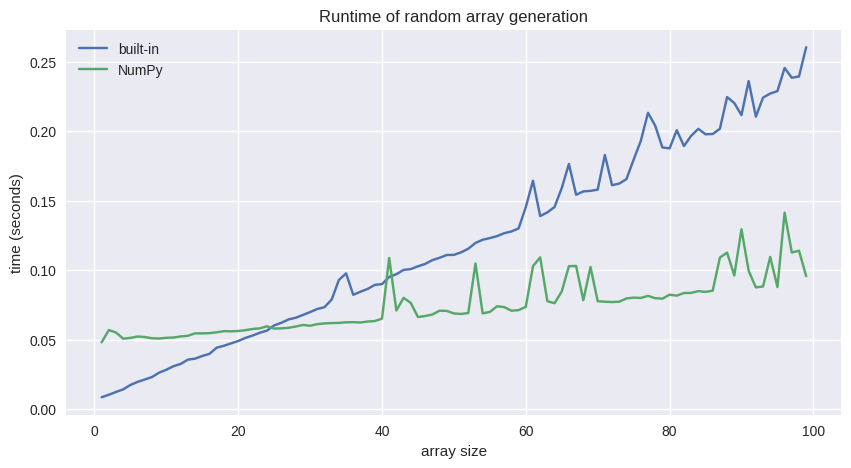

In [66]:
import matplotlib.pyplot as plt


with plt.style.context("seaborn-v0_8"):
    plt.figure(figsize=(10, 5))
    plt.plot(sizes, runtime_builtin, label="built-in")
    plt.plot(sizes, runtime_numpy, label="NumPy")
    plt.xlabel("array size")
    plt.ylabel("time (seconds)")
    plt.title("Runtime of random array generation")
    plt.legend()
    plt.show()